In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

In [4]:
file_path = '/content/drive/My Drive/Colab Notebooks/dataset_cybersecurity_michelle.csv'
df = pd.read_csv(file_path, na_values = -1)

In [5]:
#drops the columns that have zero variance
unique_counts = df.nunique()
constant_columns = unique_counts[unique_counts == 1].index.tolist()
print(constant_columns)
print(len(constant_columns))
df.shape

['qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_questionmark_directory', 'qty_hashtag_directory', 'qty_slash_file', 'qty_questionmark_file', 'qty_hashtag_file', 'qty_dollar_file', 'qty_hashtag_params']
20


(129698, 112)

In [6]:
df_cleaned_zero_variance = df.drop(columns= constant_columns)

In [7]:
df_cleaned_zv_dr = df_cleaned_zero_variance.drop_duplicates() #drops duplicate rows
df_cleaned_zv_dr.shape

(87209, 92)

In [8]:
df_cleaned_zv_dr.head(2)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,1,0,0,0,0,0,0,...,2.0,2,5,292.0,0,NaN,0.0,0.0,0,1
1,2,5,4,2,0,0,0,0,0,0,...,2.0,4,2,52.0,0,1.0,0.0,0.0,0,1


In [ ]:
#drops the columns that are atleast 90% zeros as they don't contriubute much to the machine learning algorithms and are just overheads
num_cols = df_cleaned_zv_dr.select_dtypes(include=[np.number]).columns
zero_frac = (df_cleaned_zv_dr[num_cols] == 0).mean(axis=0)
cols_to_drop = zero_frac[zero_frac >= 0.9].index.tolist()

exclude = ['domain_in_ip', 'server_client_domain', 'email_in_url', 'url_google_index', 'domain_google_index', 'url_shortened']
cols_to_drop = [c for c in cols_to_drop if c not in exclude]

print("Columns to drop (>=90% zeros):", cols_to_drop)
print("Count:", len(cols_to_drop))

if cols_to_drop:
    display(df_cleaned_zv_dr[cols_to_drop].head())

df_no_sparse_cols = df_cleaned_zv_dr.drop(columns=cols_to_drop).copy()
print("New shape:", df_no_sparse_cols.shape)

Columns to drop (>=90% zeros): ['qty_underline_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_at_domain']
Count: 17


,qty_underline_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_hyphen_domain,qty_underline_domain,qty_at_domain
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


New shape: (87209, 75)


In [10]:
#drops the columns that are atleast 30% NaN values
src = df_no_sparse_cols.copy()

missing_frac = src.isna().mean()

cols_to_drop = missing_frac[missing_frac >= .30].index.tolist()

print("Columns to drop (>=30% missing):", cols_to_drop)
print("Count:", len(cols_to_drop))

print('count1',src.isna().sum())

if cols_to_drop:
    display(src[cols_to_drop].head())

df_no_30pct_missing = src.drop(columns=cols_to_drop).copy()
print("New shape:", df_no_30pct_missing.shape)

Columns to drop (>=30% missing): ['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_percent_file', 'file_length', 'qty_dot_params', 'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params', 'qty_questionmark_params', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 'qty_plus_params', 'qty_asterisk_params', 'qty_dollar_params', 'qty_percent_params',

,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,...,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


New shape: (87209, 26)


In [19]:
#forward fill the columns that have less than 30% NaNs
df_ffilled_cols = df_no_30pct_missing.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
print("Remaining NaNs total:", df_ffilled_cols.isna().sum().sum())
display(df_ffilled_cols.head())

Remaining NaNs total: 0


/tmp/ipython-input-1677775069.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffilled_cols = df_no_30pct_missing.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
/tmp/ipython-input-1677775069.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffilled_cols = df_no_30pct_missing.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)


,qty_dot_url,qty_hyphen_url,qty_slash_url,qty_tld_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1.0,0.0,1.0,1.0,13.0,1.0,1.0,7.0,0.0,0.0,...,2.0,2.0,5.0,292.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,5.0,2.0,1.0,329.0,2.0,8.0,24.0,0.0,0.0,...,2.0,4.0,2.0,52.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,0.0,0.0,1.0,24.0,2.0,7.0,24.0,0.0,0.0,...,2.0,2.0,0.0,298.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,2.0,1.0,23.0,1.0,5.0,17.0,0.0,0.0,...,1.0,2.0,5.0,1792.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,1.0,0.0,1.0,23.0,2.0,6.0,23.0,0.0,0.0,...,1.0,2.0,1.0,299.0,1.0,1.0,0.0,0.0,0.0,0.0


In [20]:
#applied MinMaxScaler so that the values are all between 0 and 1 so that the machine learning algorithm doesn't get dominant features just due to the values not being scaled correctly
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = df_ffilled_cols.select_dtypes(include=[np.number]).columns.tolist()
binary_cols = [c for c in num_cols
               if set(pd.Series(df_ffilled_cols[c].dropna()).unique()).issubset({0, 1}) or
               df_ffilled_cols[c].nunique(dropna=True) == 2]
cont_cols = [c for c in num_cols if c not in binary_cols]

df_scaled = df_ffilled_cols.copy()
if cont_cols:
    df_scaled.loc[:, cont_cols] = scaler.fit_transform(df_ffilled_cols.loc[:, cont_cols])

print("Scaled continuous cols:", len(cont_cols))
display(df_scaled[cont_cols].describe().T)


Scaled continuous cols: 18


,count,mean,std,min,25%,50%,75%,max
qty_dot_url,87209.0,0.051921,0.053875,0.0,0.043478,0.043478,0.043478,1.0
qty_hyphen_url,87209.0,0.009472,0.032184,0.0,0.000000,0.000000,0.000000,1.0
qty_slash_url,87209.0,0.029379,0.043092,0.0,0.000000,0.000000,0.045455,1.0
qty_tld_url,87209.0,0.087348,0.021343,0.0,0.083333,0.083333,0.083333,1.0
length_url,87209.0,0.007803,0.011115,0.0,0.003124,0.004326,0.008411,1.0
qty_dot_domain,87209.0,0.089077,0.033412,0.0,0.047619,0.095238,0.095238,1.0
qty_vowels_domain,87209.0,0.089335,0.041631,0.0,0.065574,0.081967,0.114754,1.0
domain_length,87209.0,0.064237,0.029053,0.0,0.044053,0.061674,0.079295,1.0
time_response,87209.0,0.022784,0.036831,0.0,0.006548,0.012413,0.023152,1.0
domain_spf,87209.0,0.020426,0.049348,0.0,0.000000,0.000000,0.029732,1.0


In [13]:
df_scaled.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'qty_tld_url',
       'length_url', 'qty_dot_domain', 'qty_vowels_domain', 'domain_length',
       'domain_in_ip', 'server_client_domain', 'email_in_url', 'time_response',
       'domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened', 'phishing'],
      dtype='object')

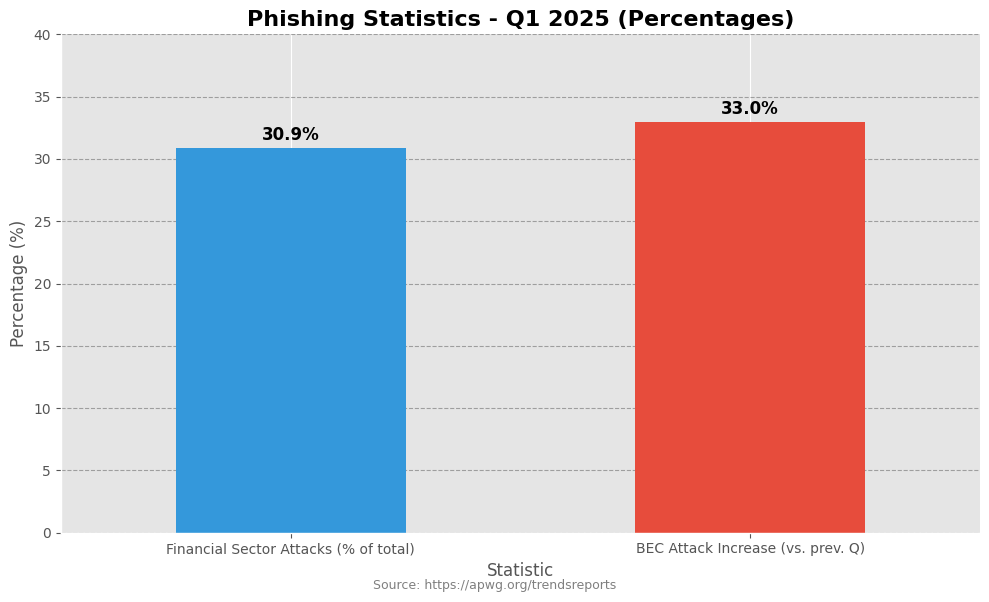

In [23]:
#cell that makes the introduction graph
import pandas as pd
import matplotlib.pyplot as plt

total_attacks = 1_003_924
data = {
    'Statistic': [
        'Financial Sector Attacks (% of total)',
        'BEC Attack Increase (vs. prev. Q)'
    ],
    'Percentage': [30.9, 33.0]
}

df = pd.DataFrame(data)
plt.style.use('ggplot')

ax = df.plot(
    kind='bar',
    x='Statistic',
    y='Percentage',
    legend=False,
    figsize=(10, 6),
    color=['#3498db', '#e74c3c']
)
ax.set_title(
    'Phishing Statistics - Q1 2025 (Percentages)',
    fontsize=16,
    fontweight='bold'
)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Statistic', fontsize=12)
ax.set_xticklabels(df['Statistic'], rotation=0, ha='center')
ax.set_ylim(0, 40)
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 9),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold'
    )

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.figtext(
    0.5,
    0.01,
    "Source: https://apwg.org/trendsreports",
    ha="center",
    fontsize=9,
    color='grey'
)
plt.show()



/tmp/ipython-input-160640819.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Phishing Status', data=df, order=['Legitimate', 'Phishing'], palette=['#5cb85c', '#d9534f'])
/tmp/ipython-input-160640819.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Phishing Status', y='length_url', data=df, order=['Legitimate', 'Phishing'], palette=['#5cb85c', '#d9534f'])
/tmp/ipython-input-160640819.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


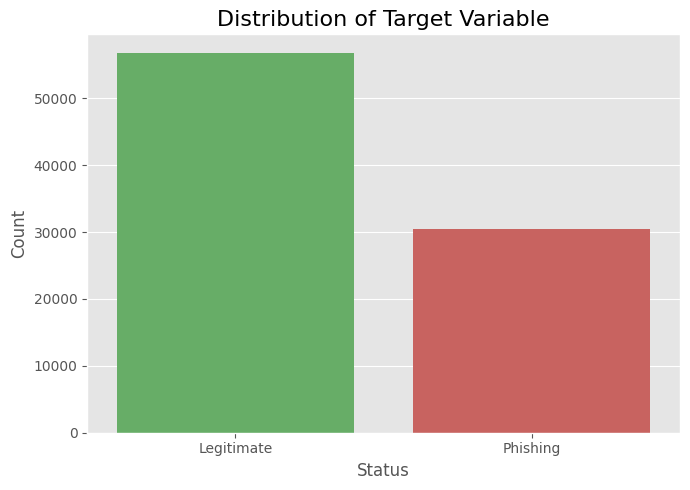

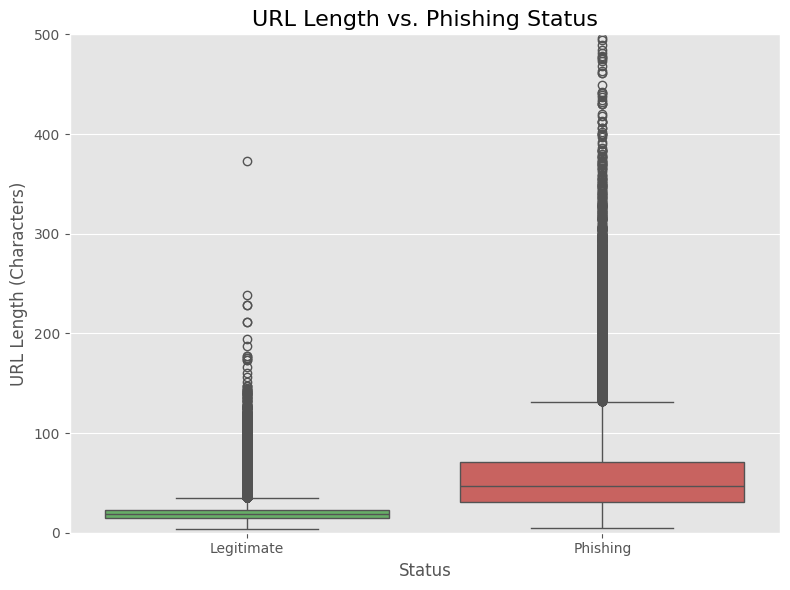

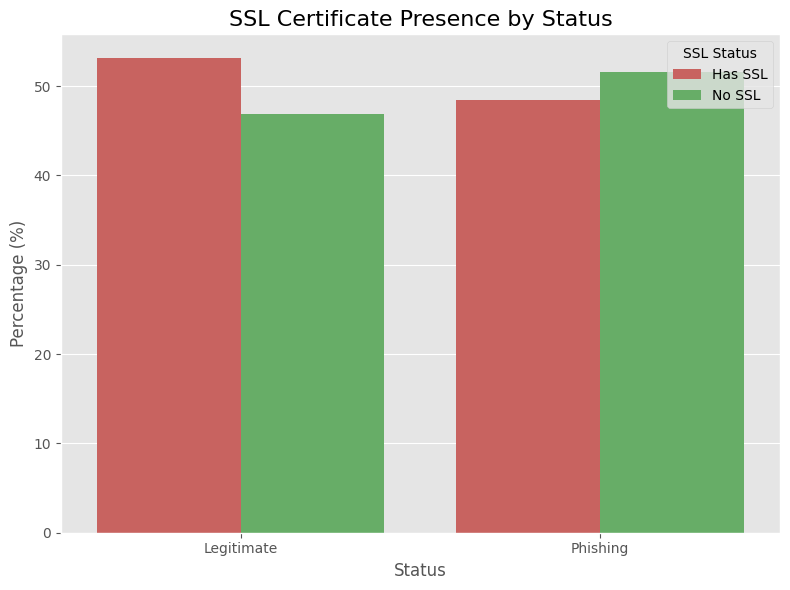

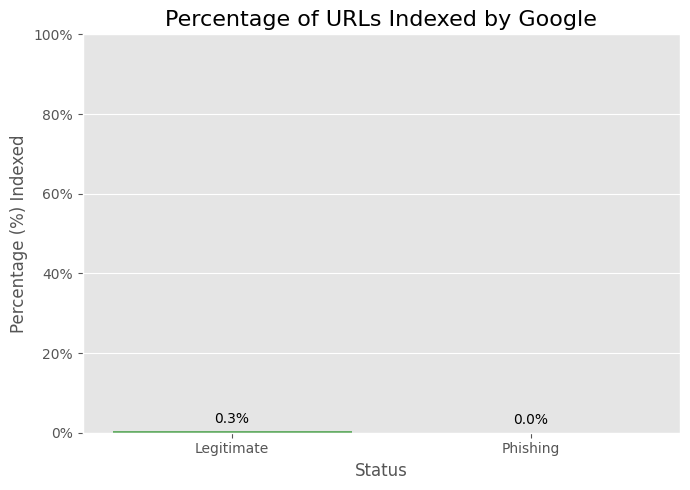

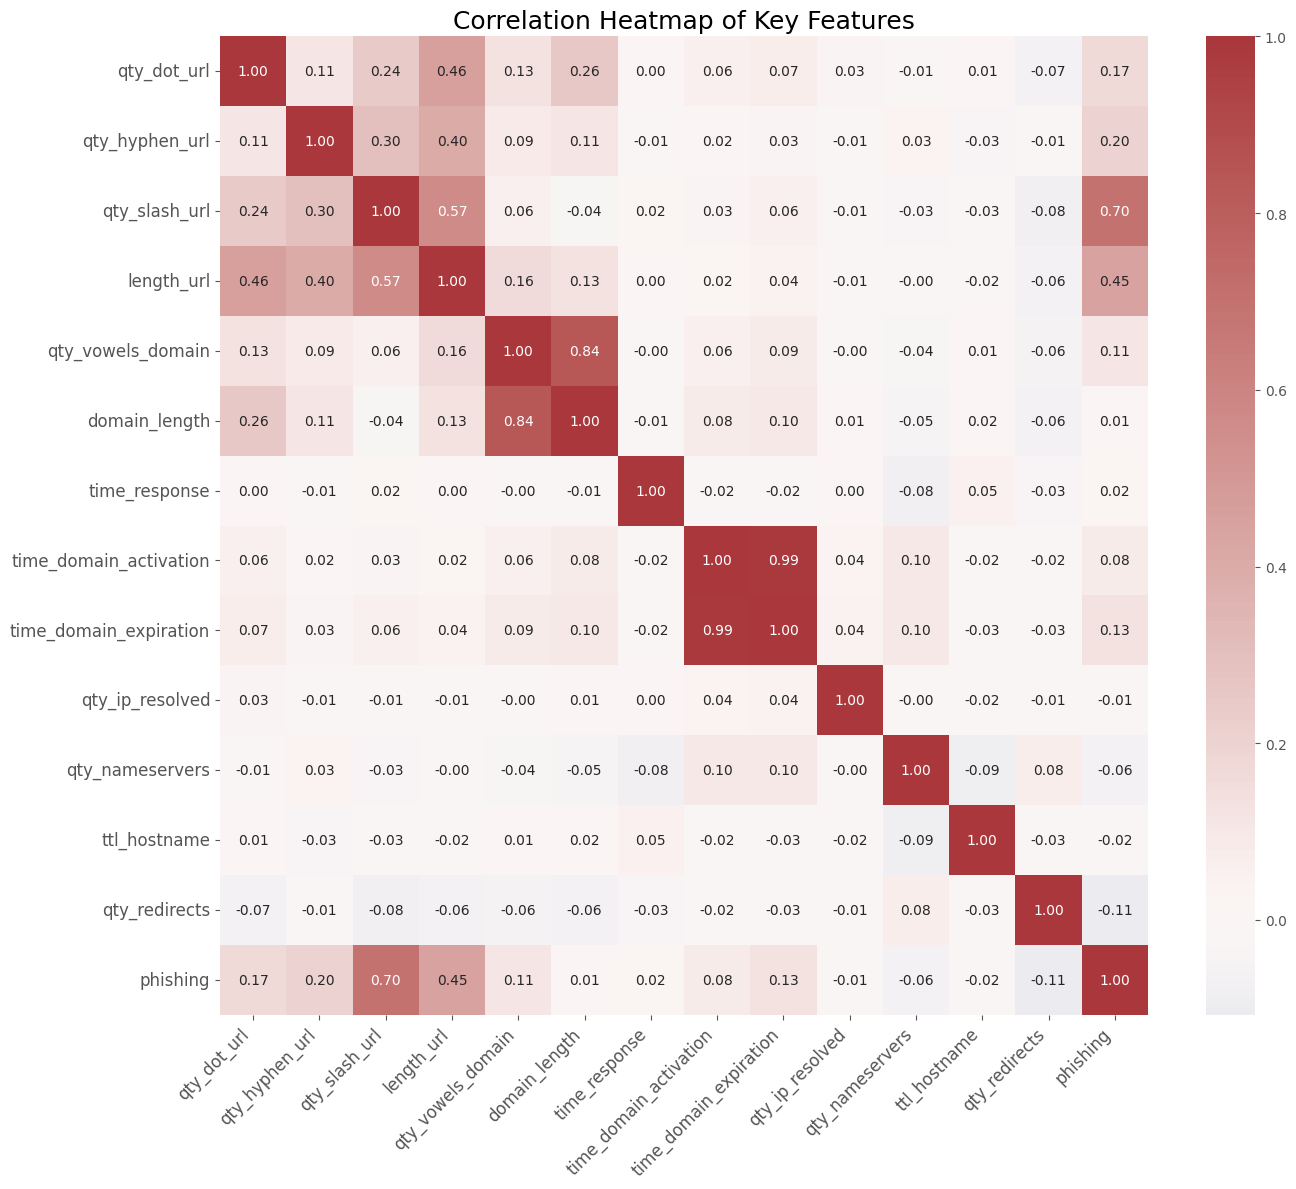

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

final_columns = [
    'qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'qty_tld_url',
    'length_url', 'qty_dot_domain', 'qty_vowels_domain', 'domain_length',
    'domain_in_ip', 'server_client_domain', 'email_in_url', 'time_response',
    'domain_spf', 'asn_ip', 'time_domain_activation',
    'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
    'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
    'qty_redirects', 'url_google_index', 'domain_google_index',
    'url_shortened', 'phishing'
]


df = df_ffilled_cols[final_columns].copy()

df['Phishing Status'] = df['phishing'].map({0: 'Legitimate', 1: 'Phishing'})

#Makes the graph of the count of the Phishing and legitimate urls in the dataset

plt.figure(figsize=(7, 5))
sns.countplot(x='Phishing Status', data=df, order=['Legitimate', 'Phishing'], palette=['#5cb85c', '#d9534f'])
plt.title('Distribution of Target Variable', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Status', fontsize=12)
plt.tight_layout()

#Makes the Box graph of the Url lenght
plt.figure(figsize=(8, 6))
sns.boxplot(x='Phishing Status', y='length_url', data=df, order=['Legitimate', 'Phishing'], palette=['#5cb85c', '#d9534f'])
plt.title('URL Length vs. Phishing Status', fontsize=16)
plt.ylabel('URL Length (Characters)', fontsize=12)
plt.xlabel('Status', fontsize=12)
plt.ylim(0, 500)
plt.tight_layout()

#Bar Graph of the SSL certification
ssl_data = df.groupby('Phishing Status')['tls_ssl_certificate'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
ssl_data['tls_ssl_certificate'] = ssl_data['tls_ssl_certificate'].map({0.0: 'No SSL', 1.0: 'Has SSL'})
plt.figure(figsize=(8, 6))
sns.barplot(x='Phishing Status', y='Percentage', hue='tls_ssl_certificate', data=ssl_data, order=['Legitimate', 'Phishing'], palette=['#d9534f', '#5cb85c'])
plt.title('SSL Certificate Presence by Status', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Status', fontsize=12)
plt.legend(title='SSL Status')
plt.tight_layout()

# Google Index Bar Graph
df['Google Index Status'] = df['url_google_index'].map({0.0: 'Not Indexed', 1.0: 'Indexed'})
google_index_data = df.groupby('Phishing Status')['Google Index Status'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
indexed_data = google_index_data[google_index_data['Google Index Status'] == 'Indexed'].copy()
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    x='Phishing Status',
    y='Percentage',
    data=indexed_data,
    order=['Legitimate', 'Phishing'],
    palette=['#5cb85c', '#d9534f']
)
plt.title('Percentage of URLs Indexed by Google', fontsize=16)
plt.ylabel('Percentage (%) Indexed', fontsize=12)
plt.xlabel('Status', fontsize=12)
plt.ylim(0, 100)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()

#Correlation Heap Map
numeric_features_subset = [
    'qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'length_url',
    'qty_vowels_domain', 'domain_length', 'time_response',
    'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved',
    'qty_nameservers', 'ttl_hostname', 'qty_redirects', 'phishing'
]
corr_matrix = df[numeric_features_subset].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='vlag', center=0, annot_kws={"size": 10})
plt.title('Correlation Heatmap of Key Features', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

Validation accuracy: 0.97098956541681
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     11355
         1.0       0.95      0.97      0.96      6087

    accuracy                           0.97     17442
   macro avg       0.97      0.97      0.97     17442
weighted avg       0.97      0.97      0.97     17442

Confusion matrix:
 [[11043   312]
 [  194  5893]]


/tmp/ipython-input-3101103148.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


ROC AUC: 0.995769893711302
5-fold CV (accuracy): 0.968558391838276


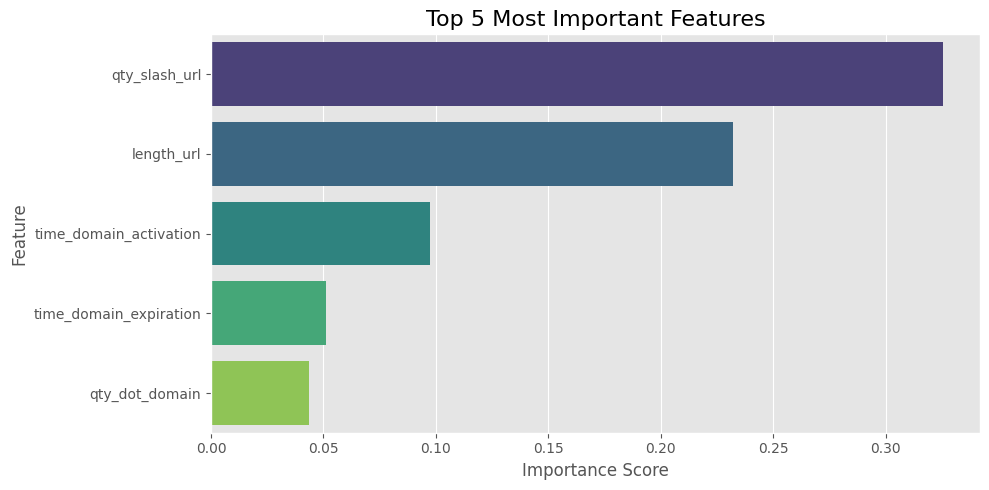

In [ ]:
#Running the random forest classifier to see if the data can make predictions
TARGET_COL = 'phishing'
data = df_scaled.copy()

y = data[TARGET_COL].copy()
X = data.drop(columns=[TARGET_COL])

X = pd.get_dummies(X, drop_first=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
print("Validation accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

importances = rf.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_5_features,
    palette='viridis'
)

plt.title('Top 5 Most Important Features', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

print("ROC AUC:", roc_auc_score(y_val, rf.predict_proba(X_val)[:,1]))
print("5-fold CV (accuracy):", cross_val_score(rf, X, y, cv=5, scoring='accuracy', n_jobs=-1).mean())

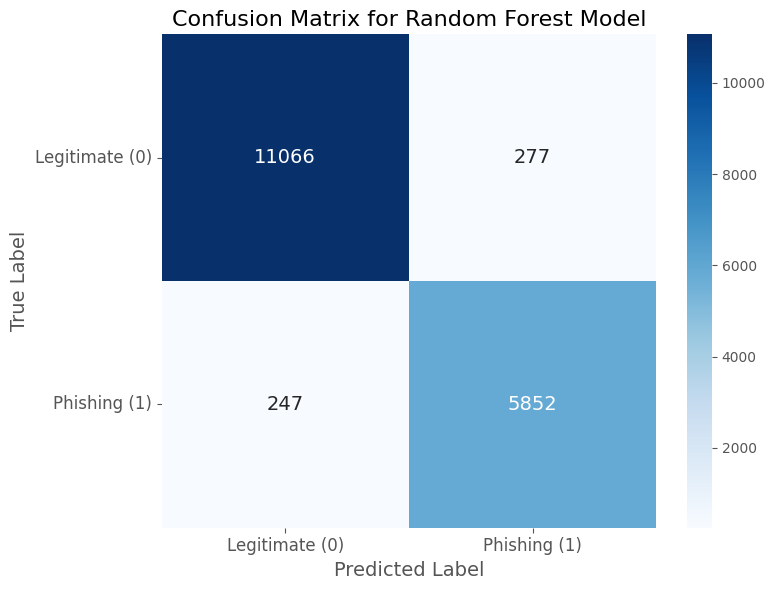

In [25]:
#Makes the heat map for the confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cm_data = np.array([[11066, 277],
                    [247,   5852]])
labels = ['Legitimate (0)', 'Phishing (1)']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_data,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels,
            annot_kws={"size": 14}
           )
plt.title('Confusion Matrix for Random Forest Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()